In [1]:
import numpy as np 
import pandas as pd
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [5]:
import numpy as np # for making Numpy array

import pandas as pd # for making data frame

import matplotlib.pyplot as plt 

In [7]:
df =pd.read_csv('Shopping Mall Customer Segmentation Data .csv')

In [8]:
df.head(-5)

,Customer ID,Age,Gender,Annual Income,Spending Score
0,d410ea53-6661-42a9-ad3a-f554b05fd2a7,30,Male,151479,89
1,1770b26f-493f-46b6-837f-4237fb5a314e,58,Female,185088,95
2,e81aa8eb-1767-4b77-87ce-1620dc732c5e,62,Female,70912,76
3,9795712a-ad19-47bf-8886-4f997d6046e3,23,Male,55460,57
4,64139426-2226-4cd6-bf09-91bce4b4db5e,24,Male,153752,76
...,...,...,...,...,...
15069,5ba45b3d-8dfa-4b93-8f81-5e0a40aff47e,55,Male,71393,85
15070,50fbfed1-7d60-4398-bf45-3f246bb6369f,45,Female,68342,79
15071,720d5085-0248-4939-b8c1-9261b5896cb5,40,Female,27768,88
15072,02da8108-fe4f-4300-a4d3-e2210f8d240f,35,Female,105107,49


In [9]:
df.shape

(15079, 5)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15079 entries, 0 to 15078
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Customer ID     15079 non-null  object
 1   Age             15079 non-null  int64 
 2   Gender          15079 non-null  object
 3   Annual Income   15079 non-null  int64 
 4   Spending Score  15079 non-null  int64 
dtypes: int64(3), object(2)
memory usage: 589.2+ KB


In [11]:
df.isnull().sum()

Customer ID       0
Age               0
Gender            0
Annual Income     0
Spending Score    0
dtype: int64

In [12]:
df.columns

Index(['Customer ID', 'Age', 'Gender', 'Annual Income', 'Spending Score'], dtype='object')

In [13]:
x = df.iloc[:,[3,4]].values
print(x)


[[151479     89]
 [185088     95]
 [ 70912     76]
 ...
 [112337     48]
 [ 94312      5]
 [ 78045      2]]


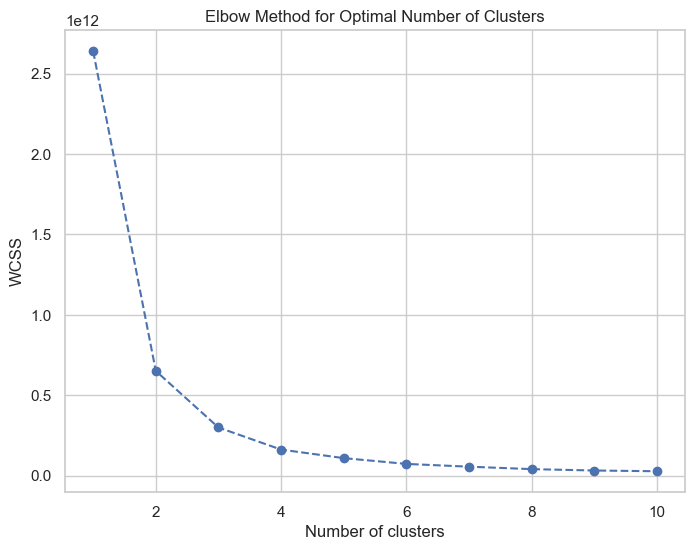

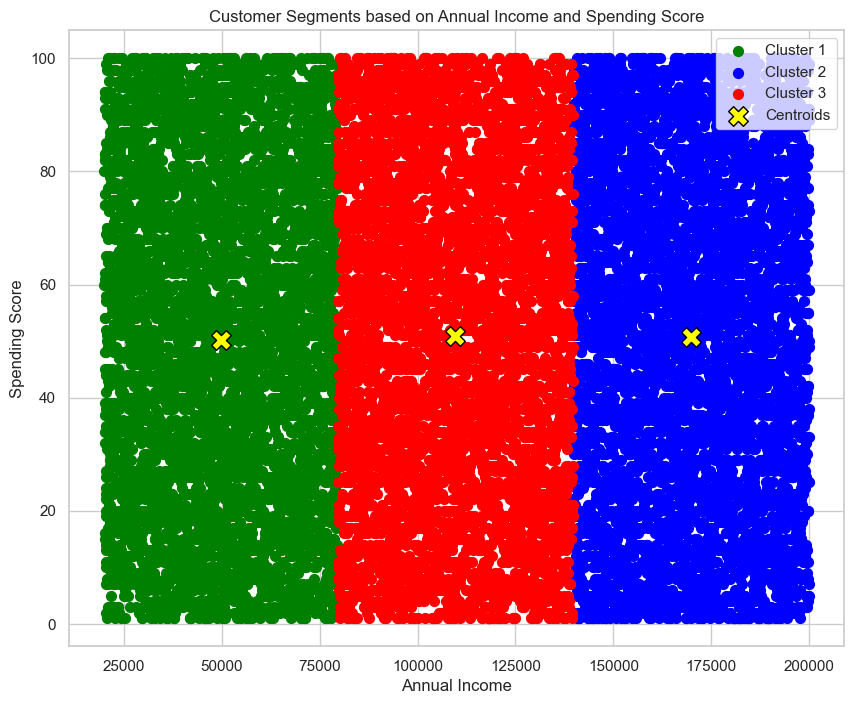

np.float64(0.5926621113571519)

In [18]:
# Re-import necessary libraries and reload the dataset due to session reset
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# Reload the dataset from the uploaded file
file_path = 'Shopping Mall Customer Segmentation Data .csv'
df = pd.read_csv(file_path)

# Extract 'Annual Income' and 'Spending Score' for clustering
X = df[['Annual Income', 'Spending Score']].values

# To optimize, we'll take a sample for testing
X_sampled = X[:1000]

# Re-run the elbow method with fewer points for efficiency
wcss = []

# Compute WCSS (Within-Cluster-Sum of Squares) for 1 to 10 clusters
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(X_sampled)
    wcss.append(kmeans.inertia_)

# Plotting the Elbow Graph
plt.figure(figsize=(8, 6))
sns.set(style='whitegrid')
plt.plot(range(1, 11), wcss, marker='o', linestyle='--', color='b')
plt.title('Elbow Method for Optimal Number of Clusters')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

# Choosing 3 clusters based on the elbow graph and applying K-Means on the full dataset
kmeans = KMeans(n_clusters=3, init='k-means++', random_state=42)
labels = kmeans.fit_predict(X)

# Visualizing the clusters with centroids
plt.figure(figsize=(10, 8))
plt.scatter(X[labels == 0, 0], X[labels == 0, 1], s=50, c='green', label='Cluster 1')
plt.scatter(X[labels == 1, 0], X[labels == 1, 1], s=50, c='blue', label='Cluster 2')
plt.scatter(X[labels == 2, 0], X[labels == 2, 1], s=50, c='red', label='Cluster 3')

# Plotting the centroids
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], 
            s=200, c='yellow', label='Centroids', edgecolor='black', marker='X')
plt.title('Customer Segments based on Annual Income and Spending Score')
plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
plt.legend()
plt.show()

# Calculating the silhouette score for accuracy evaluation
silhouette_avg = silhouette_score(X, labels)
silhouette_avg


In [23]:
from sklearn.metrics import silhouette_score

# Calculate the silhouette score
silhouette_avg = silhouette_score(X, labels)
print(f'Silhouette Score: {silhouette_avg}')


Silhouette Score: 0.5926621113571519


In [24]:
from sklearn.metrics import davies_bouldin_score

# Calculate Davies-Bouldin index
db_score = davies_bouldin_score(X, labels)
print(f'Davies-Bouldin Score: {db_score}')


Davies-Bouldin Score: 0.49786422058683494


In [21]:
labels = kmeans.fit_predict(x)
print(labels)

[1 1 0 ... 2 2 0]


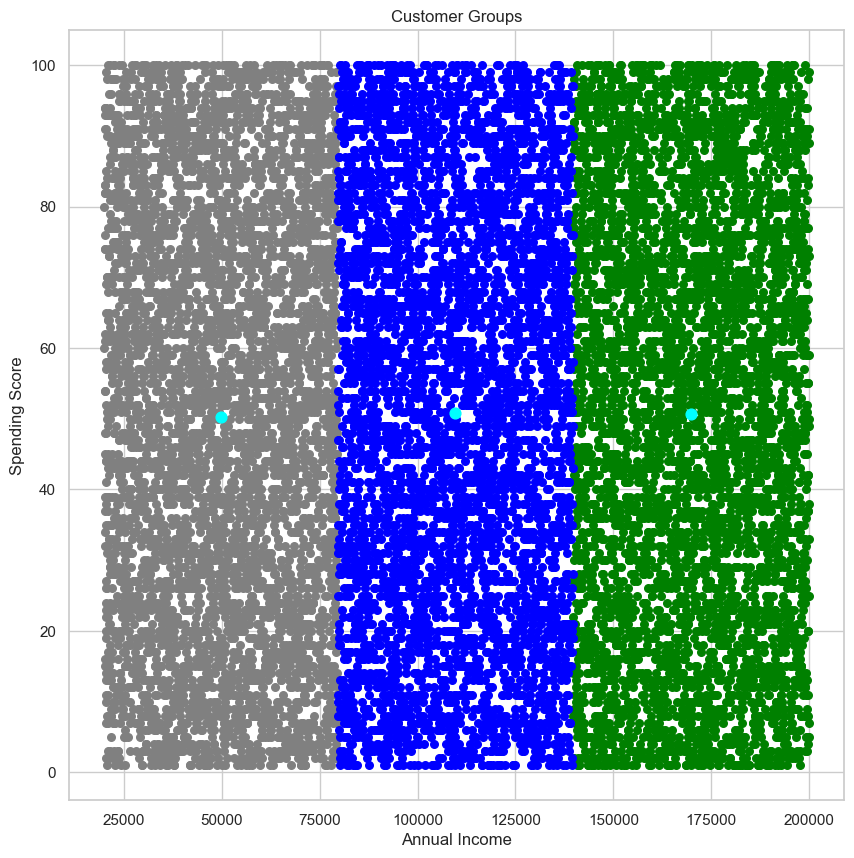

In [22]:
plt.figure(figsize=(10,10))
plt.scatter(x[labels==0,0], x[labels==0,1], s=30, c='grey', label ='cluster 1')
plt.scatter(x[labels==1,0], x[labels==1,1], s=30, c='green', label ='cluster 2')
plt.scatter(x[labels==2,0], x[labels==2,1], s=30, c='blue', label ='cluster 3')

# all in x[labels == #,0] 0 repesent the annual income which is first column in x
# all 1 in x[labels == #,1] 1 represent the sprending score which is second column i x

# Ploting Centroids
plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1], s=60, c='cyan', label='Centroids')
plt.title('Customer Groups')
plt.xlabel("Annual Income")
plt.ylabel("Spending Score")
plt.show()